# 데이터 이미지 파일 점검 및 변환

In [1]:
# 필요 라이브러리 import
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
from PIL import Image

In [2]:
# 데이터 경로 설정
train_data_path = os.path.join(os.getcwd(), 'dataset', 'trainset')
test_data_path = os.path.join(os.getcwd(), 'dataset', 'problemset')

In [38]:
# 이미지 확장자 확인
def check_extension(data_path, data_type):
    ext_freq = {}
    size_freq = {}

    for label in os.listdir(data_path):
        if label == '.DS_Store':    # Mac OS에서 생성되는 숨김 파일은 무시
            continue

        if data_type == 'train':
            folder_path = os.path.join(data_path, label)
        elif data_type == 'test':
            folder_path = data_path

        for file_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file_name)
        
            # 파일의 확장자 확인
            extension = pathlib.Path(image_path).suffix
            if extension not in ext_freq.keys():
                ext_freq[extension] = 1
            else:
                ext_freq[extension] += 1

            # 이미지의 사이즈(가로, 세로) 확인
            with Image.open(image_path) as img:
                width, height = img.size
                image_size = (width, height)
                if image_size not in size_freq.keys():
                    size_freq[image_size] = 1
                else:
                    size_freq[image_size] += 1
        
        if data_type == 'test':
            break
            
    return ext_freq, size_freq

train_ext_freq, train_image_size_freq = check_extension(train_data_path, data_type='train')
test_ext_freq, test_image_size_freq = check_extension(test_data_path, data_type='test')

In [40]:
train_ext_freq, train_image_size_freq

({'.jpg': 9990}, {(150, 150): 9990})

In [39]:
test_ext_freq, test_image_size_freq

({'.jpg': 200}, {(150, 150): 200})

> 이미지의 확장자는 .jpg, 이미지의 크기는 150x150으로 동일함을 확인할 수 있다.

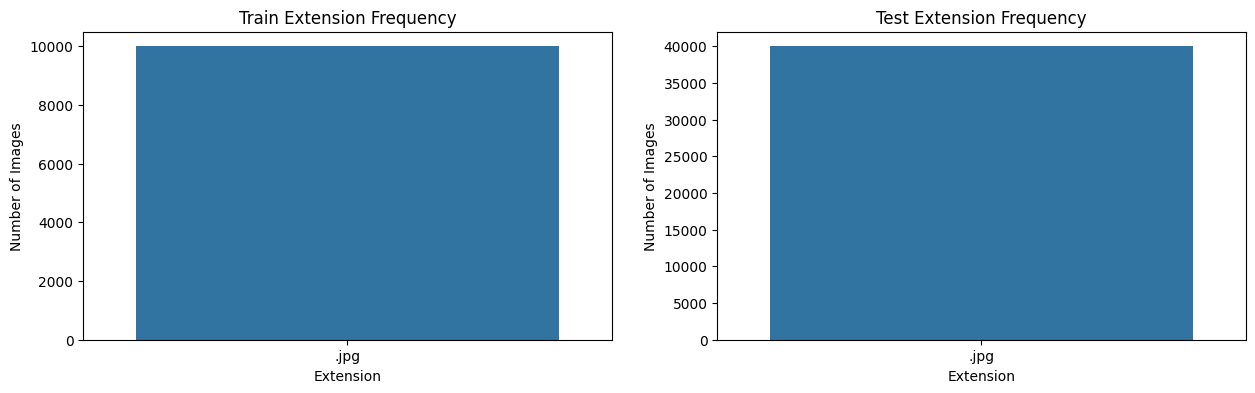

In [22]:
# 이미지 확장자별 빈도수 확인
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(train_ext_freq.keys()), y=list(train_ext_freq.values()), hue=list(train_ext_freq.keys()))
plt.xlabel('Extension')
plt.ylabel('Number of Images')
plt.title('Train Extension Frequency')

plt.subplot(1, 2, 2)
sns.barplot(x=list(test_ext_freq.keys()), y=list(test_ext_freq.values()), hue=list(test_ext_freq.keys()))
plt.xlabel('Extension')
plt.ylabel('Number of Images')
plt.title('Test Extension Frequency')

plt.show()